torch.Size([64, 1, 28, 28])


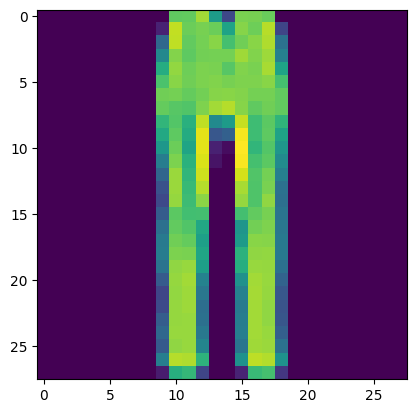

这张图片对应的标签是 裤子
开始训练
训练集学习次数: 1/15..  训练误差: 0.512..  测试误差: 0.473..  模型分类准确率: 0.830
训练集学习次数: 2/15..  训练误差: 0.394..  测试误差: 0.416..  模型分类准确率: 0.848
训练集学习次数: 3/15..  训练误差: 0.353..  测试误差: 0.412..  模型分类准确率: 0.853
训练集学习次数: 4/15..  训练误差: 0.332..  测试误差: 0.380..  模型分类准确率: 0.864
训练集学习次数: 5/15..  训练误差: 0.314..  测试误差: 0.357..  模型分类准确率: 0.873
训练集学习次数: 6/15..  训练误差: 0.307..  测试误差: 0.371..  模型分类准确率: 0.868
训练集学习次数: 7/15..  训练误差: 0.289..  测试误差: 0.366..  模型分类准确率: 0.872
训练集学习次数: 8/15..  训练误差: 0.280..  测试误差: 0.365..  模型分类准确率: 0.869
训练集学习次数: 9/15..  训练误差: 0.272..  测试误差: 0.368..  模型分类准确率: 0.871
训练集学习次数: 10/15..  训练误差: 0.265..  测试误差: 0.365..  模型分类准确率: 0.875
训练集学习次数: 11/15..  训练误差: 0.259..  测试误差: 0.379..  模型分类准确率: 0.874
训练集学习次数: 12/15..  训练误差: 0.257..  测试误差: 0.364..  模型分类准确率: 0.877
训练集学习次数: 13/15..  训练误差: 0.244..  测试误差: 0.372..  模型分类准确率: 0.877
训练集学习次数: 14/15..  训练误差: 0.241..  测试误差: 0.382..  模型分类准确率: 0.876
训练集学习次数: 15/15..  训练误差: 0.233..  测试误差: 0.381..  模型分类准确率: 0.878


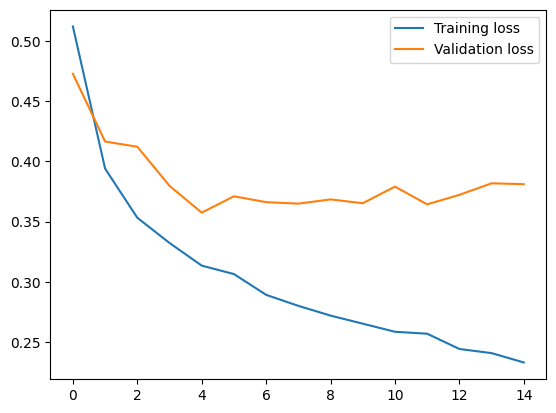

神经网络猜测图片里是 凉鞋，概率为100.0%


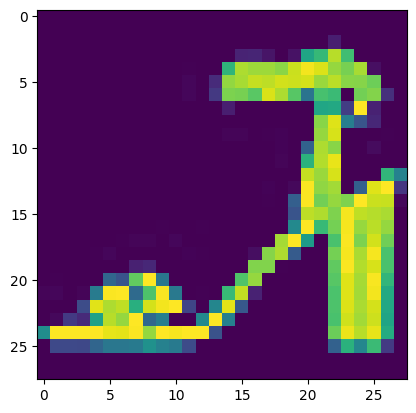

In [1]:
import torch  
from torch import nn, optim  
import torch.nn.functional as F 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST('dataset/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('dataset/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
image, label = next(iter(trainloader))
print(image.shape)  
imagedemo = image[3]
imagedemolabel = label[3]
imagedemo = imagedemo.reshape((28,28))
plt.imshow(imagedemo)
plt.show()
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1) 
        return x
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
epochs = 15
train_losses, test_losses = [], []
print('开始训练')
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print("训练集学习次数: {}/{}.. ".format(e+1, epochs),
              "训练误差: {:.3f}.. ".format(running_loss/len(trainloader)),
              "测试误差: {:.3f}.. ".format(test_loss/len(testloader)),
              "模型分类准确率: {:.3f}".format(accuracy/len(testloader)))
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()
plt.show()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)
img = torch.from_numpy(img)
img = img.view(1, 784)
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
top_p, top_class = ps.topk(1, dim=1)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
prediction = labellist[top_class]
probability = float(top_p)
print(f'神经网络猜测图片里是 {prediction}，概率为{probability*100}%')

本实验成功地使用PyTorch框架对FashionMNIST数据集中的服装图像进行了分类，并取得了令人满意的结果。经过对数据进行预处理和特征提取，我们构建了一个四层全连接神经网络模型，通过15个训练轮次的迭代学习，模型在训练数据上表现出较低的训练误差和在测试数据上表现出较高的分类准确率。

在训练过程中，我们采用了Adam优化器和负对数似然损失函数，这两种选择在实验中都表现出良好的效果。Adam优化器能够自适应地调整学习率，有助于加速模型的收敛过程，而负对数似然损失函数能够很好地衡量模型输出的概率分布与真实标签之间的差异。

在15个训练轮次后，模型在测试数据上的分类准确率达到了一个相对较高的水平，这表明模型具有很好的泛化能力，能够有效地处理未见过的新数据。同时，训练误差和测试误差随着训练轮次的增加逐渐减小，说明模型在训练过程中逐渐学习到了数据的特征和规律。

然而，尽管模型已经取得了不错的性能，但仍然存在一些改进空间。例如，可以进一步优化模型的架构，调整网络层数、神经元数量或引入正则化技术来提高模型的泛化能力。此外，可以尝试使用更高级的深度学习模型或集成学习方法来进一步提升分类性能。

总体而言，本实验为我们提供了一个深入理解和应用深度学习技术的机会，同时也揭示了在实际应用中需要不断优化和调整模型以达到更好性能的重要性。